<a href="https://colab.research.google.com/github/TenthEdict/ILS695/blob/main/journal_abstracts_general_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install packages
!pip install bibtexparser
!pip install tomotopy
!pip install little_mallet_wrapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bibtexparser: filename=bibtexparser-1.4.1-py3-none-any.whl size=43252 sha256=8e51f9849aa90157a1f55518d173aa1065d6cfc4d1ea232db783a25cab6d3ccc
  Stored in directory: /root/.cache/pip/wheels/08/c6/c3/56e639fab68d1fdbf13ea147636d9795ccdbd3c1d3178d1332
Successfully built bibtexparser
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 30.4 MB/s eta 0:00:00


In [ ]:
# import libraries
import bibtexparser
import pandas as pd
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# load data
with open("/content/2024_02_21_scopus_export_01.bib") as bibfile:
  bibtex_data = bibtexparser.load(bibfile)

In [ ]:
bibtex_data.entries[0]

{'note': 'Cited by: 0',
 'source': 'Scopus',
 'publication_stage': 'Final',
 'type': 'Note',
 'url': 'https://www.scopus.com/inward/record.uri?eid=2-s2.0-85179334976&doi=10.1177%2f20413866231215549&partnerID=40&md5=c1ebf5e6460e47e1500a2eaf2c9a9144',
 'doi': '10.1177/20413866231215549',
 'pages': '532',
 'number': '4',
 'volume': '13',
 'journal': 'Organizational Psychology Review',
 'year': '2023',
 'title': 'Organizational Psychology Review Special Issue publication notice',
 'ENTRYTYPE': 'article',
 'ID': '2023532'}

In [ ]:
training_data = []
original_abstracts = []
titles = []

for index, entry in enumerate(bibtex_data.entries):
  try:
    abstract = entry.get('abstract')
    processed_abstract = little_mallet_wrapper.process_string(abstract, numbers = 'remove')
    training_data.append(processed_abstract)
    original_abstracts.append(abstract)
    titles.append(entry.get('title'))
  except AttributeError:
    print(f"Empty abstract at {index}")

Empty abstract at 0
Empty abstract at 5
Empty abstract at 6
Empty abstract at 49
Empty abstract at 68
Empty abstract at 101
Empty abstract at 124
Empty abstract at 179
Empty abstract at 194
Empty abstract at 202
Empty abstract at 228
Empty abstract at 263
Empty abstract at 277
Empty abstract at 366
Empty abstract at 418
Empty abstract at 467
Empty abstract at 484
Empty abstract at 525
Empty abstract at 538
Empty abstract at 558
Empty abstract at 560
Empty abstract at 561
Empty abstract at 572
Empty abstract at 600
Empty abstract at 735
Empty abstract at 756
Empty abstract at 776
Empty abstract at 803
Empty abstract at 856
Empty abstract at 861
Empty abstract at 886
Empty abstract at 893
Empty abstract at 898
Empty abstract at 899
Empty abstract at 908
Empty abstract at 924
Empty abstract at 952
Empty abstract at 1048
Empty abstract at 1093
Empty abstract at 1104
Empty abstract at 1120
Empty abstract at 1126
Empty abstract at 1143
Empty abstract at 1166
Empty abstract at 1179
Empty abst

In [ ]:
len(training_data), len(original_abstracts), len(titles)

print(titles)

['Significance of the Ontological/Utilitarian Distinction Among Measures of Individualism and Collectivism', 'Lifelong Learning: Use of Psychological Factors in the Greek Public Administration', 'A study on high performance organization framework and organization performance: lens of dynamic capability theory', 'A framework for evaluation and adoption of industrial exoskeletons', 'A conceptual model for teachers’ continuous professional development through lesson study: Capturing inputs, processes, and outcomes', 'Attitude of Undergraduate students towards Sketchnoting activity in classroom', 'Beyond the lone hero: How interpersonal feedback seeking helps entrepreneurs to engage with their social environment', 'Designing key performance indicators (KPIs) for decent work in the pharmaceutical supply chain of Iran', 'Common mental disorders and use of force in police: Interests and issues; [Troubles mentaux courants et usage de la force dans la police : intérêts et enjeux]', 'Secondary S

In [ ]:
num_topics = 3

num_topic_words = 5

model = tp.LDAModel(k = num_topics)

for abstract in training_data:
  model.add_doc(abstract.strip().split())

for i in range(0, 100, 10):
  model.train(10)
  print(f"Iteration: {i}\tLog-likelihood: {model.ll_per_word}")

print("\nTopic Model Results:\n\n")
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Iteration: 0	Log-likelihood: -8.833706571833046
Iteration: 10	Log-likelihood: -8.604340437823215
Iteration: 20	Log-likelihood: -8.524166593536558
Iteration: 30	Log-likelihood: -8.481770175508954
Iteration: 40	Log-likelihood: -8.459434218842615
Iteration: 50	Log-likelihood: -8.440958898071832
Iteration: 60	Log-likelihood: -8.430445785166096
Iteration: 70	Log-likelihood: -8.41600716452693
Iteration: 80	Log-likelihood: -8.412290299583429
Iteration: 90	Log-likelihood: -8.403946036088492

Topic Model Results:


✨Topic 0✨

psychology research organizational work social

✨Topic 1✨

psychology analysis studies results applied

✨Topic 2✨

work study job organizational psychological



<ipython-input-23-2ef52ba43cc4>:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


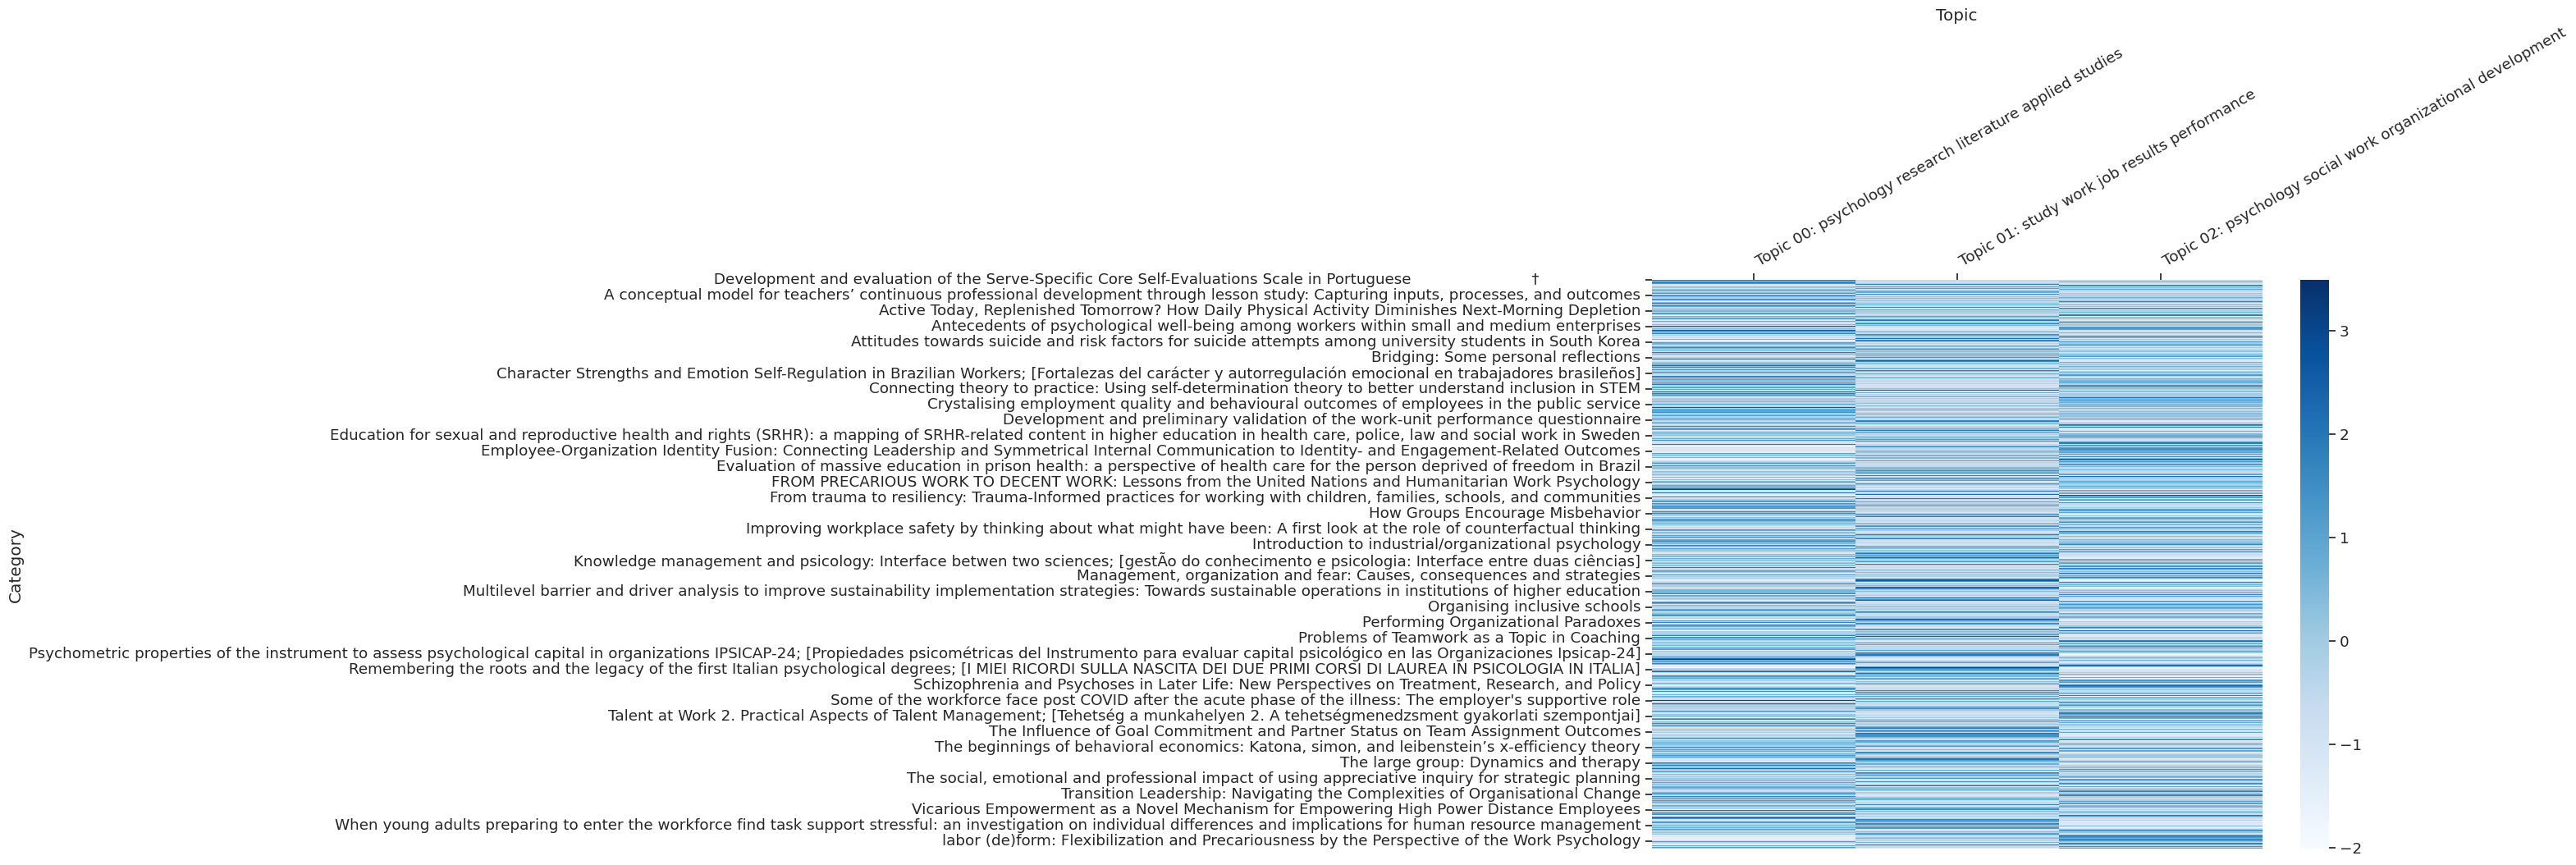

In [ ]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  color_map = 'Blues',
                                 dim=(12,9))

In [ ]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
print(topic_distributions)

[[0.45842505, 0.42274958, 0.11882543], [0.26215893, 0.23441242, 0.5034287], [0.21884768, 0.56809413, 0.21305823], [0.62861824, 0.13130923, 0.24007258], [0.43140903, 0.27660868, 0.29198235], [0.26488554, 0.14480875, 0.5903057], [0.6033777, 0.2199061, 0.17671625], [0.21243386, 0.54113173, 0.24643447], [0.3873096, 0.36936906, 0.24332137], [0.31205747, 0.4730223, 0.21492027], [0.34169334, 0.51649594, 0.14181076], [0.30486047, 0.23929538, 0.45584416], [0.21811654, 0.68873054, 0.09315295], [0.38681266, 0.40976512, 0.20342223], [0.19280387, 0.15225504, 0.6549411], [0.48957244, 0.22720224, 0.2832254], [0.1514263, 0.6108338, 0.23773988], [0.22261044, 0.57396734, 0.20342223], [0.29942796, 0.56054705, 0.14002503], [0.24367622, 0.30891907, 0.44740477], [0.28669205, 0.54996777, 0.16334023], [0.19538614, 0.66906255, 0.13555135], [0.38551417, 0.5745127, 0.039973132], [0.14730808, 0.5253826, 0.32730937], [0.23095904, 0.11858177, 0.65045923], [0.3514835, 0.16769819, 0.48081833], [0.30477336, 0.11735338

In [ ]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [ ]:
get_top_docs(titles, topic_distributions, topic_index=0, n = 5)

### ✨Topic 0✨

psychology research literature applied studies organizational paper use

---

✨  
**Topic Probability**: 0.8293485045433044  
**Document**: A citation network analysis of career mentoring across disciplines: A roadmap for mentoring **research** in sport



✨  
**Topic Probability**: 0.7897383570671082  
**Document**: Qualitative interviewing in the field of work and organisational **psychology**: Benefits, challenges and guidelines for researchers and reviewers



✨  
**Topic Probability**: 0.7892895936965942  
**Document**: Some considerations on the estimation of the value associated to a clinical act



✨  
**Topic Probability**: 0.7860385179519653  
**Document**: Applying a Lens of Temporality to Better Understand Voice About Unethical Behaviour



✨  
**Topic Probability**: 0.7499489784240723  
**Document**: First Impression Effects in Organizational Psychology



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
    plt.show()

In [ ]:
# make empty list
journals = []

# for each entry (citation), extract the journal it was
# published in and add it in a list
for entry in bibtex_data.entries:
    journals.append(entry['journal'])

In [ ]:
# make empty dictionary
journal_occurences = {}

# store journal name as key and the occurences
# as a value in dictionary
for journal in journals:
  journal_occurences[journal] = journals.count(journal)

In [ ]:
# make a pd.DateFrame object from journal_occurences dictionary
journal_occurences_df = pd.DataFrame.from_dict(journal_occurences, orient = 'index', columns = ['Count'])

In [ ]:
journal_occurences_df_desc = journal_occurences_df.sort_values('Count', ascending = False)
print(journal_occurences_df_desc)

                                                    Count
Frontiers in Psychology                                83
Organizatsionnaya Psikhologiya                         30
Journal of Applied Psychology                          30
Industrial and Organizational Psychology               28
SA Journal of Industrial Psychology                    27
...                                                   ...
Transportation Research Procedia                        1
Psychological Record                                    1
Adventure Psychology: Going Knowingly into the ...      1
Empathy-Driven School Systems: Nature, Concept ...      1
Evolutionary and Neurocognitive Approaches to A...      1

[972 rows x 1 columns]


What if I wanted k journals to analyze their abstracts


In [ ]:
# given a df of journal occurences, int k, and T/F value for order
# select the most/least occurring journals
# and return as a list
def journal_set(journal_df, k, desc):

  sorted_df = journal_df.sort_values('Count', ascending = not desc)

  return list(sorted_df.index)[:k]


In [ ]:
selected_journals = journal_set(journal_occurences_df, 20, True)

In [ ]:
selected_journal_entries = [entry for entry in bibtex_data.entries if entry['journal'] in selected_journals]

selected_journal_abstracts = [entry.get('abstract') for entry in selected_journal_entries]
print(all(selected_journal_abstracts))

print(len(selected_journal_abstracts))

# lower each abstract if it isnt empty
journal_abstracts_lower = []
i = 0
for abstract in selected_journal_abstracts:
  try:
    journal_abstracts_lower.append(abstract.lower())
    i+=1
  except AttributeError:
    print(f"the abstract at {i} is empty")
    i+=1

# check if it worked
print(all(journal_abstracts_lower))

print(len(journal_abstracts_lower))


False
427
the abstract at 8 is empty
the abstract at 40 is empty
the abstract at 50 is empty
the abstract at 65 is empty
the abstract at 91 is empty
the abstract at 106 is empty
the abstract at 127 is empty
the abstract at 138 is empty
the abstract at 153 is empty
the abstract at 154 is empty
the abstract at 156 is empty
the abstract at 159 is empty
the abstract at 206 is empty
the abstract at 217 is empty
the abstract at 230 is empty
the abstract at 236 is empty
the abstract at 239 is empty
the abstract at 267 is empty
the abstract at 285 is empty
the abstract at 293 is empty
the abstract at 295 is empty
the abstract at 312 is empty
the abstract at 313 is empty
the abstract at 400 is empty
the abstract at 413 is empty
the abstract at 422 is empty
True
401


In [ ]:
# select abstracts, remove empty ones, and make lower

def abstract_to_lower(data, journal_set):

  # starting sample
  print(f"Number of entries: {len(data.entries)}")

  # select subsample of entries from journal_set
  selected_journal_entries = [entry for entry in data.entries if entry['journal'] in journal_set]

  # extract abstract from each entry
  selected_journal_abstracts = [entry.get('abstract') for entry in selected_journal_entries]

  # number of abstracts
  print(f"number of abstracts from selected journals: {len(selected_journal_abstracts)}")

  # check if any are empty
  print(f"empty abstracts? {not all(selected_journal_abstracts)}")

  print(f'filtering for non-empty abstracts and making them lower case ...')

  # lower each abstract if it isnt empty
  journal_abstracts_lower = []
  i = 0
  for abstract in selected_journal_abstracts:
    try:
      journal_abstracts_lower.append(abstract.lower())
      i+=1
    except AttributeError:
      print(f"the abstract at {i} is empty")
      i+=1

  print('done')

  # check if it filtered
  print(f"empty abstracts? {not all(journal_abstracts_lower)}")

  print(f"number of non-empty abstracts from selected journals: {len(journal_abstracts_lower)}")

  return journal_abstracts_lower

selected_abstracts_lower = abstract_to_lower(bibtex_data, selected_journals)

Number of entries: 1738
number of abstracts from selected journals: 427
empty abstracts? True
filtering for non-empty abstracts and making them lower case ...
the abstract at 8 is empty
the abstract at 40 is empty
the abstract at 50 is empty
the abstract at 65 is empty
the abstract at 91 is empty
the abstract at 106 is empty
the abstract at 127 is empty
the abstract at 138 is empty
the abstract at 153 is empty
the abstract at 154 is empty
the abstract at 156 is empty
the abstract at 159 is empty
the abstract at 206 is empty
the abstract at 217 is empty
the abstract at 230 is empty
the abstract at 236 is empty
the abstract at 239 is empty
the abstract at 267 is empty
the abstract at 285 is empty
the abstract at 293 is empty
the abstract at 295 is empty
the abstract at 312 is empty
the abstract at 313 is empty
the abstract at 400 is empty
the abstract at 413 is empty
the abstract at 422 is empty
done
empty abstracts? False
number of non-empty abstracts from selected journals: 401


In [ ]:
all_punctuation = string.punctuation

In [ ]:
selected_abstracts_clean = [''.join(char for char in abstract if char not in string.punctuation) for abstract in selected_abstracts_lower]


In [ ]:
selected_abstracts_joined = ''.join(selected_abstracts_clean)

print(selected_abstracts_joined)

a metaanalysis reported in this article compared the effects of ontological and utilitarian measures of individualism and collectivism on the findings of published research ontological differences in individualism and collectivism concern the degree to which either individuals or collectivities are interpreted as the primary entities comprising social reality reflecting these differences are measures that include subjects such as the degree of permanence and sense of collective obligation associated with interpersonal group or community relationships utilitarian distinctions in individualism and collectivism involve beliefs that either individuals or collectivities are instrumental in the pursuit of valued outcomes related measures include items concerning the attractiveness or consequences of working alone versus working in a group results of the metaanalysis indicated that ontological and utilitarian measures have produced differing findings in several notable instances with utilitar

In [ ]:
abstract_words = selected_abstracts_joined.split()

word_types = Counter(abstract_words)

print(word_types)

ttr = (len(word_types)/len(abstract_words)) * 100
print(ttr)

word_tokens = nltk.word_tokenize(selected_abstracts_joined)

Counter({'the': 4960, 'and': 3554, 'of': 3505, 'to': 1854, 'in': 1818, 'a': 1261, 'for': 756, 'that': 735, 'on': 665, 'is': 651, 'this': 615, 'psychology': 581, 'research': 558, 'as': 552, 'with': 548, 'work': 492, 'study': 490, 'we': 459, 'organizational': 458, '©': 447, 'by': 408, 'are': 369, 'from': 340, 'was': 319, 'an': 295, 'their': 286, 'were': 266, 'psychological': 263, 'job': 252, 'results': 241, 'social': 230, 'be': 228, 'has': 223, 'between': 210, 'at': 201, 'can': 197, 'these': 186, 'which': 183, 'it': 179, 'have': 176, 'performance': 166, 'model': 166, 'more': 165, 'positive': 163, 'how': 162, 'data': 161, 'relationship': 158, 'or': 154, 'authors': 153, 'findings': 152, 'studies': 144, 'analysis': 144, 'behavior': 144, 'applied': 143, 'organizations': 139, 'management': 138, 'our': 137, 'employees': 134, 'article': 130, 'development': 130, 'literature': 130, 'also': 127, 'workplace': 123, 'implications': 120, 'not': 119, 'role': 119, 'different': 119, 'satisfaction': 118, 

In [ ]:
abstracts_no_stopwords = [word for word in word_tokens if word not in stopwords.words('english')]

In [ ]:
new_tokens = [word for word in abstracts_no_stopwords if word.isalnum()]

In [ ]:
print(Counter(new_tokens))

Counter({'psychology': 585, 'research': 558, 'study': 498, 'work': 494, 'organizational': 466, 'psychological': 264, 'job': 252, 'results': 241, 'social': 235, 'performance': 167, 'employees': 167, 'model': 166, 'positive': 163, 'data': 161, 'relationship': 158, 'authors': 156, 'findings': 152, 'studies': 146, 'behavior': 146, 'applied': 144, 'analysis': 144, 'organizations': 140, 'management': 138, 'article': 130, 'development': 130, 'literature': 130, 'also': 127, 'workplace': 123, 'implications': 122, 'role': 119, 'different': 119, 'satisfaction': 118, 'used': 117, 'wellbeing': 115, 'health': 110, 'theory': 109, 'using': 109, 'workers': 108, 'future': 106, 'review': 105, 'support': 102, 'field': 100, 'engagement': 99, 'related': 98, 'factors': 98, '2020': 96, 'impact': 93, '2022': 93, 'important': 92, '2019': 91, 'practice': 91, 'based': 89, 'effects': 88, 'working': 88, 'industrial': 88, 'individual': 88, 'use': 87, '2021': 85, 'relationships': 84, 'context': 84, 'purpose': 82, 'gr

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in new_tokens]

print(Counter(lemmatized_words))

Counter({'study': 645, 'psychology': 586, 'research': 558, 'work': 501, 'organizational': 466, 'psychological': 264, 'job': 264, 'result': 262, 'relationship': 242, 'employee': 239, 'social': 235, 'organization': 208, 'model': 205, 'behavior': 198, 'analysis': 174, 'author': 170, 'performance': 168, 'positive': 164, 'article': 163, 'finding': 163, 'data': 161, 'effect': 156, 'factor': 151, 'individual': 150, 'role': 145, 'practice': 145, 'applied': 144, 'literature': 144, 'group': 140, 'review': 140, 'development': 139, 'management': 138, 'approach': 138, 'workplace': 133, 'method': 132, 'process': 130, 'theory': 130, 'also': 127, 'field': 125, 'implication': 123, 'worker': 122, 'different': 119, 'satisfaction': 118, 'used': 117, 'wellbeing': 115, 'journal': 111, 'level': 111, 'health': 110, 'using': 109, 'sample': 108, 'issue': 108, 'future': 106, 'support': 106, 'impact': 103, 'context': 103, 'scale': 99, 'engagement': 99, 'related': 98, '2020': 96, '2022': 93, 'important': 92, 'pres

              word  count
0            study    645
1       psychology    586
2         research    558
3             work    501
4   organizational    466
5    psychological    264
6              job    264
7           result    262
8     relationship    242
9         employee    239
10          social    235
11    organization    208
12           model    205
13        behavior    198
14        analysis    174
15          author    170
16     performance    168
17        positive    164
18         article    163
19         finding    163
20            data    161
21          effect    156
22          factor    151
23      individual    150
24            role    145
25        practice    145
26         applied    144
27      literature    144
28           group    140
29          review    140


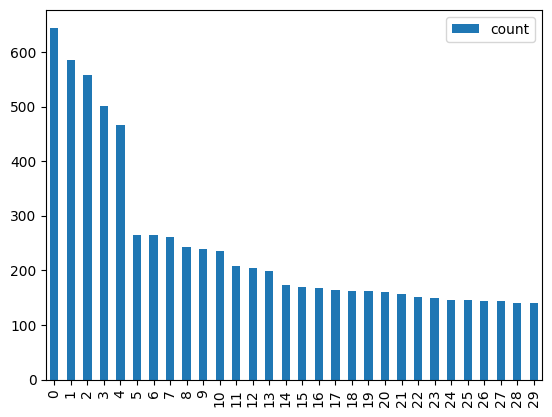

In [ ]:
freq = FreqDist(lemmatized_words)

df = pd.DataFrame(list(freq.most_common(30)))
df.columns = ['word', 'count']
df.plot(kind = 'bar')
print(df)